# Classification

## Pull in the MNIST data set

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [8]:
sys.version_info, sklearn.__version__

(sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0),
 '0.21.2')

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [13]:
mnist['details']

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'format': 'ARFF',
 'upload_date': '2014-09-29T03:28:38',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'status': 'active',
 'processing_date': '2018-10-03 21:23:30',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [14]:
X, y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

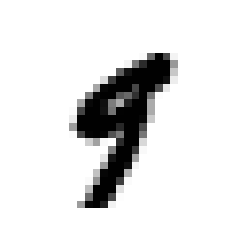

In [17]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [18]:
y[36000]

'9'

In [20]:
y = y.astype(np.uint8)

In [21]:
y[36000]

9

In [22]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


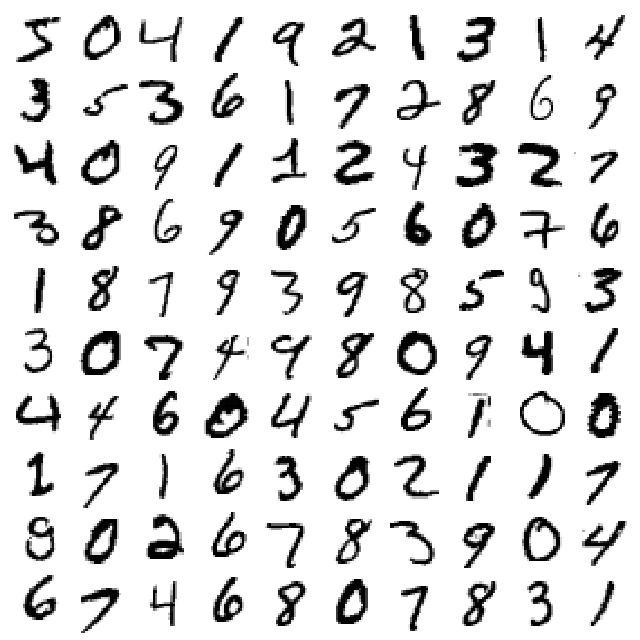

In [23]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [24]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [48]:
sevens = (y_test == 7)

In [49]:
from functools import reduce
reduce((lambda m, n: m + (1 if n else 0)), sevens, 0)

1028

In [61]:
sum(sevens)

1028

## Stochastic Gradient Descent Classiffier

In [50]:
y_train_5, y_test_5 = (y_train == 5), (y_test == 5)

In [51]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [53]:
sgd_clf.predict([some_digit])

array([False])

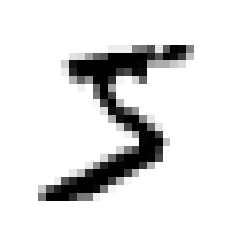

In [54]:
another_digit = X[0]

another_digit_image = another_digit.reshape(28, 28)

plt.imshow(another_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [55]:
sgd_clf.predict([another_digit])

array([ True])

In [56]:
from sklearn.model_selection import cross_val_score
sgd_clf2 = SGDClassifier(random_state=42)
cross_val_score(sgd_clf2, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [57]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [58]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

### Do the cross validation manually _just for fun_

In [62]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [65]:
from sklearn.base import BaseEstimator

class Noper(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [69]:
noper_clf = Noper()

cross_val_score(noper_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

### Confusion Matrix

In [71]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [73]:
print("... but pretending we're perfect:")
confusion_matrix(y_train_5, y_train_5)

... but pretending we're perfect:


array([[54579,     0],
       [    0,  5421]], dtype=int64)

### Precision and Recall

In [74]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred), recall_score(y_train_5, y_train_pred)

(0.8370879772350012, 0.6511713705958311)

In [75]:
print("... calculate manually:")
print("precision: percent of things we said were positive which actually were")
print("recall: percent of actual positives that we tagged as such")
3530 / (3530 + 687), 3530 / (3530 + 1891)

... calculate manually:
precision: percent of things we said were positive which actually were
recall: percent of actual positives that we tagged as such


(0.8370879772350012, 0.6511713705958311)

### $F_1$ score - _harmonic mean_ of precision and recall

In [76]:
# harmonic mean should be reciprocal of the mean of the reciprocals
def mean(x,y):
    return (x+y) / 2

def harmonic_mean(x, y):
    return 1/mean(1/x, 1/y)

harmonic_mean(4,4), harmonic_mean(4,5), harmonic_mean(4,100), harmonic_mean(4,100000)

(4.0, 4.444444444444445, 7.692307692307692, 7.999680012799487)

In [77]:
harmonic_mean(0.8370879772350012, 0.6511713705958311)

0.7325171197343847

In [79]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

### Precision/Recall Tradeoff

In [82]:
y_scores = sgd_clf.decision_function([another_digit])
y_scores

array([2164.22030239])

In [83]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [84]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [85]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure precision_recall_vs_threshold_plot


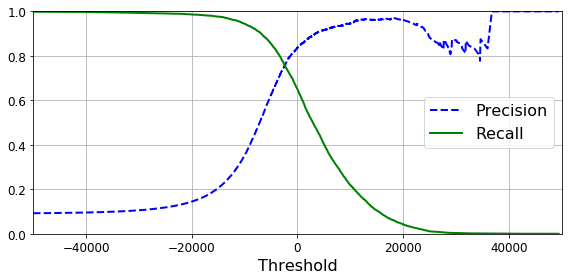

In [87]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown

plt.figure(figsize=(8, 4))                      # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
save_fig("precision_recall_vs_threshold_plot")  # Not shown
plt.show()

#### Suppose false negs cost 10X false pos ? What should we do?

Let $\alpha$ be the ratio of cost that a false negative incurs over a false positive, where $C$ denotes the cost. So:

$$ C = \alpha \cdot \rm{False Neg} + \rm{False Pos} $$

Let $K$ be the number of actual positives. 
Let $P$ and $R$ resp. be the precision and recall.

Some algebra shows that:

$$ C = \alpha K (1-R) + R K \left( \frac{1}{P} - 1\right) $$

Since we're just trying to minimize $C$, we can pull out the constant $K$ and redefine:

$$ C = \alpha (1-R) + R \left( \frac{1}{P} - 1\right) $$


In [88]:
alpha = 10
K = sum(y_train_5)
alpha, K

(10, 5421)

In [91]:
def cost(precision, recall, alpha=10):
    return alpha*(1-recall) + recall * (1/precision -1)

In [92]:
cost(0.8370879772350012, 0.6511713705958311)

3.615015679763881

In [94]:
precisions.shape, recalls.shape

((59967,), (59967,))

In [95]:
type(precisions)

numpy.ndarray

In [103]:
p_and_r = np.column_stack((precisions,recalls))
p_and_r.shape

(59967, 2)

In [107]:
costs = np.apply_along_axis(lambda a: cost(a[0],a[1]), 1, p_and_r)
costs.shape

(59967,)

In [109]:
max_cost, min_cost = max(costs), min(costs)
max_cost, min_cost

(10.063641394576647, 1.8360081165836561)

In [110]:
normalized_costs = costs / max_cost
normalized_costs.shape

(59967,)

Saving figure precision_recall_cost_vs_threshold_plot


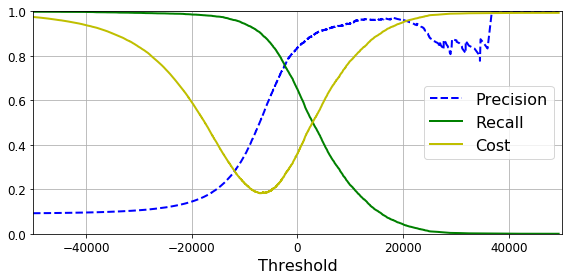

In [112]:
def plot_p_r_c(precisions, recalls, costs, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.plot(thresholds, costs[:-1], "y-", label="Cost", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown

plt.figure(figsize=(8, 4))                      # Not shown
plot_p_r_c(precisions, recalls, normalized_costs, thresholds)
save_fig("precision_recall_cost_vs_threshold_plot")  # Not shown
plt.show()

#### So what was the optimal threshold / precision / recall as adjudicated by cost?

In [117]:
at_min = (costs == min_cost)
sum(at_min)

1

In [118]:
best_p, best_r = precisions[at_min], recalls[at_min]
best_p, best_r

(array([0.512955]), array([0.90204759]))

In [128]:
def best_p_r(precisions, recalls, alpha):
    p_and_r = np.column_stack((precisions,recalls))
    costs = np.apply_along_axis(lambda a: cost(a[0],a[1], alpha=alpha), 1, p_and_r)
    min_cost = min(costs)
    at_min = (costs == min_cost)
    best_p, best_r = precisions[at_min], recalls[at_min]
    return [best_p[0], best_r[0]]    

In [129]:
best_p_r(precisions, recalls, 10)

[0.5129549984265184, 0.9020475926950747]

In [133]:
alphas = range(-100,101,10)
def p_r_c_summary(alpha, best_p_r):
    return {'alpha': alpha, 'precision': best_p_r[0], 'recall': best_p_r[1]}

bests = map(lambda alpha: p_r_c_summary(alpha, best_p_r(precisions, recalls, alpha)), alphas)
list(bests)

[{'alpha': -100, 'precision': 1.0, 'recall': 0.0},
 {'alpha': -90, 'precision': 1.0, 'recall': 0.0},
 {'alpha': -80, 'precision': 1.0, 'recall': 0.0},
 {'alpha': -70, 'precision': 1.0, 'recall': 0.0},
 {'alpha': -60, 'precision': 1.0, 'recall': 0.0},
 {'alpha': -50, 'precision': 1.0, 'recall': 0.0},
 {'alpha': -40, 'precision': 1.0, 'recall': 0.0},
 {'alpha': -30, 'precision': 1.0, 'recall': 0.0},
 {'alpha': -20, 'precision': 1.0, 'recall': 0.0},
 {'alpha': -10, 'precision': 1.0, 'recall': 0.0},
 {'alpha': 0, 'precision': 1.0, 'recall': 0.0009223390518354548},
 {'alpha': 10, 'precision': 0.5129549984265184, 'recall': 0.9020475926950747},
 {'alpha': 20, 'precision': 0.44065112186537614, 'recall': 0.9238147943183914},
 {'alpha': 30, 'precision': 0.355461426289841, 'recall': 0.9442907212691385},
 {'alpha': 40, 'precision': 0.3130555723529056, 'recall': 0.9549898542704298},
 {'alpha': 50, 'precision': 0.29636809396202746, 'recall': 0.9588636782881387},
 {'alpha': 60, 'precision': 0.2963680